In [190]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

# Data Preparation

### ⚠️ Cảnh báo lỗi cấu trúc Link
Việc sử dụng phương pháp `split("/")[-2]` thường dễ bị lỗi nếu link Google Drive có cấu trúc khác hoặc chứa các tham số lạ (ví dụ: `?usp=drive_link`).

### ✅ Giải pháp tải dữ liệu tối ưu
Sử dụng **Regular Expression (Regex)** để trích xuất chính xác ID giúp code hoạt động ổn định hơn:

```python
import re
import pandas as pd

# 1. Khai báo link dữ liệu
data_link = '[https://drive.google.com/file/d/1hsrYiSekqvoDdrKek8b88hw6WsYrYpFF/view?usp=drive_link](https://drive.google.com/file/d/1hsrYiSekqvoDdrKek8b88hw6WsYrYpFF/view?usp=drive_link)'

# 2. Dùng Regex để tìm ID (chuỗi ký tự nằm sau /d/ và trước /view)
# Cách này giúp lấy đúng ID kể cả khi link có tham số phức tạp
file_id = re.search(r'/d/([^/]+)', data_link).group(1)

# 3. Tạo link tải trực tiếp
data_path = f'[https://drive.google.com/uc?export=download&id=](https://drive.google.com/uc?export=download&id=){file_id}'

# 4. Đọc dữ liệu
data = pd.read_csv(data_path)
data

In [191]:
data_link = 'https://drive.google.com/file/d/1hsrYiSekqvoDdrKek8b88hw6WsYrYpFF/view?usp=drive_link'
data_path = 'http://drive.google.com/uc?id=' + data_link.split("/")[-2]
data = pd.read_csv(data_path)
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

,Percent Missing (%)
Pool QC,99.556314
Misc Feature,96.382253
Alley,93.242321
Fence,80.477816
Mas Vnr Type,60.580205
Fireplace Qu,48.532423
Lot Frontage,16.723549
Garage Qual,5.426621
Garage Cond,5.426621
Garage Yr Blt,5.426621


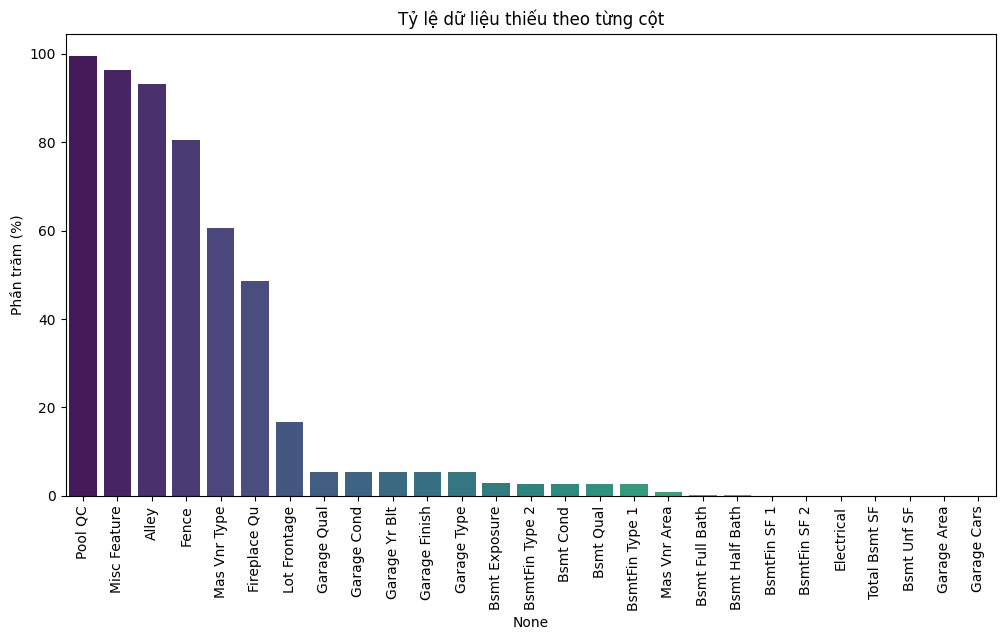

In [ ]:
# Code cũ sử dụng :  print((data.isnull().mean() * 100).to_string())
# Code mới đưa ra thông tin dễ đọc hơn 
# Tạo báo cáo thông tin về các Mising value 
def report_missing_values(df, threshold=0):
    """
    Hàm trả về bảng thống kê các cột bị thiếu dữ liệu.
    threshold: Chỉ hiện các cột thiếu trên % này (mặc định > 0%)
    """
    # 1. Tính tỷ lệ thiếu
    percent_missing = df.isnull().mean() * 100
    
    # 2. Lọc bỏ các cột đầy đủ (0% missing) và sắp xếp giảm dần
    missing_data = percent_missing[percent_missing > threshold].sort_values(ascending=False)
    
    # 3. Trả về DataFrame để hiển thị
    return pd.DataFrame({'Percent Missing (%)': missing_data})

# Gọi hàm
missing_df = report_missing_values(data)
display(missing_df)

# Vẽ biểu đồ trực quan
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y=missing_df['Percent Missing (%)'], palette='viridis',hue=missing_df.index, # Gán hue bằng trục x
                legend=False          # Tắt chú thích vì không cần thiết
                )
plt.xticks(rotation=90) # Xoay tên chữ thành cột dọc
plt.title('Tỷ lệ dữ liệu thiếu theo từng cột')
plt.ylabel('Phần trăm (%)')
plt.show()



Note:
- Alley       null       93.242321
- Mas Vnr Type    null   60.580205
- Fireplace Qu   null    48.532423
- Pool QC     null       99.556314
- Fence       null       80.477816
- Misc Feature  null     96.382253

Next Steps:
- Remove columns that have a lot of outliers

## COMMENT
CODE CŨ:
data['Alley'].unique()  # Trả về một danh sách các giá trị duy nhất xuất hiện trong cột Alley (Hẻm tiếp giáp).
kết quả : [nan, 'Pave', 'Grvl']
nan: Không có dữ liệu (chiếm đa số, >93%).
Pave: Hẻm trải nhựa (Paved).
Grvl: Hẻm rải sỏi (Gravel).



data['Mas Vnr Type'].unique()

data['Fireplace Qu'].unique()

data['Pool QC'].unique()
# remove above columns
col_to_drop = [
    'Alley',
    'Mas Vnr Type',
    'Fireplace Qu',
    'Pool QC',
    'Fence',
    'Misc Feature'
]

data = data.drop(columns=col_to_drop)
data.info()
  
### Code cũ này hơi "mạnh tay" trong việc loại bỏ thông tin . Sử dụng drop (bỏ) các cột có nhiều null như Alley, Fireplace Qu, Pool QC, Fence, Misc Feature.
Trong dữ liệu bất động sản (Ames Housing...), giá trị NaN ở các cột này thường không phải là thiếu dữ liệu, mà có nghĩa là "Không có" (ví dụ: Không có hồ bơi, không có lò sưởi). Việc drop các cột này làm mất đi thông tin cực kỳ quan trọng (nhà có hồ bơi/lò sưởi giá thường cao hơn).
Trong bất động sản, nan ở cột Alley không phải là lỗi, mà nghĩa là "Nhà này không có hẻm sau/hẻm hông". Nếu xóa cột này, làm mất thông tin: "Nhà có hẻm (dù là sỏi hay nhựa) thường có giá trị khác biệt so với nhà không có hẻm" .Ví dụ có 50 nhà Pave, 120 nhà Grvl và 2000 nhà None. Dù None chiếm đa số, nhưng 170 căn nhà có hẻm kia là những điểm dữ liệu đặc biệt (Outliers/Rare features) có thể ảnh hưởng lớn đến giá.
===>>Không Drop cột: Chúng ta giữ lại toàn bộ thông tin. Sau này khi đưa vào mô hình (Model), các thuật toán sẽ học được rằng: "À, nhà có 'Pave' thường đắt hơn nhà 'None'".

# Đối với các tiện ích chẳng hạn
'Misc Feature' : 
+ Shed: Nhà kho nhỏ chứa đồ làm vườn.
+ Gar2: Garage thứ 2 (dành cho nhà nhiều xe).
+ TenC: Sân Tennis (Tennis Court).
+ Elev: Thang máy (Elevator).

+ NaN: Không có các tiện ích trên (chiếm > 96% dữ liệu).

NaN quá nhiều nên đã liệt kê cột này vào danh sách col_to_drop để xóa bỏ. Tuy nhiên trong khoa học dữ liệu, đặc biệt là bài toán dự báo giá, chúng ta quan tâm đến 2 loại tín hiệu:
Tín hiệu phổ biến: (Ví dụ: Diện tích nhà, số phòng ngủ) -> Giúp xác định mức giá nền.
Tín hiệu hiếm (Rare Signals): (Ví dụ: Thang máy, Sân Tennis) -> Giúp xác định các điểm dữ liệu đột biến (Outliers).

Nếu xóa cột Misc Feature, máy tính sẽ coi một căn biệt thự có "Sân Tennis + Thang máy" giống hệt một căn nhà cấp 4 bình thường (nếu diện tích bằng nhau)===>> làm giảm độ chính xác của mô hình đối với phân khúc nhà cao cấp (Luxury).
### CODE MỚI : + Thay vì drop các yếu tố có nhiều Null, chúng ta điền giá trị (Impute) bằng "None" hoặc "No". Sau đó biến đổi chúng thành biến phân loại hoặc biến nhị phân (Binary: 0/1). Ví dụ: HasPool = 1 nếu PoolArea > 0.
### + Code mới cũng xử lý các lỗi logic : Như nếu nhà không có đá ốp thì diện tích đá ốp phải bằng 0 . Nhà ko có gara : Garage Type  = None thì các thông số số học như Garage Cars, Garage Area... phải là 0

# TÓM LẠI CHIẾN LƯỢC MỚI : NAN là KHÔNG CÓ!!! ===> THAY BẰNG NONE , CHỨ KO BỎ (DROP) VÀ NẾU KHÔNG CÓ THÌ THÔNG SỐ CỦA NÓ PHẢI ==0



# 📑 Ghi chú Xử lý Dữ liệu: Chiến lược "NaN là KHÔNG CÓ"

## 🔍 1. Thống kê dữ liệu thiếu (Notes)
Các cột sau đây có tỷ lệ dữ liệu trống (Null) rất cao:
- **Alley**: 93.24%
- **Mas Vnr Type**: 60.58%
- **Fireplace Qu**: 48.53%
- **Pool QC**: 99.56%
- **Fence**: 80.48%
- **Misc Feature**: 96.38%

---

## 🚫 2. Đánh giá Code cũ (Old Method)

### Cách làm: Loại bỏ hoàn toàn (Drop)
```python
# Kiểm tra giá trị duy nhất (Ví dụ: Alley trả về [nan, 'Pave', 'Grvl'])
data['Alley'].unique() 

# Loại bỏ các cột có quá nhiều Null
col_to_drop = ['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']
data = data.drop(columns=col_to_drop)

⚠️ Hạn chế:
Cách tiếp cận này quá "mạnh tay", gây mất mát thông tin quan trọng trong bài toán bất động sản:

NaN không phải lỗi: NaN ở đây nghĩa là "Không có" (Không hẻm, không hồ bơi, không lò sưởi).

Mất tín hiệu hiếm (Rare Signals): Các tiện ích như Sân Tennis (TenC), Thang máy (Elev) trong cột Misc Feature tuy ít nhưng là yếu tố quyết định giá cho phân khúc nhà cao cấp (Luxury). Nếu xóa đi, mô hình sẽ không phân biệt được nhà cấp 4 và biệt thự nếu chúng có cùng diện tích.

✅ 3. Chiến lược mới (New Strategy)
TƯ DUY: NAN = KHÔNG CÓ! Thay bằng 'None', KHÔNG DROP.

Điểm mới trong xử lý:
1 . Điền giá trị (Impute): Thay thế NaN bằng "None" hoặc "No". Sau đó biến đổi thành biến phân loại hoặc nhị phân (Binary: 0/1).

2. Xử lý lỗi logic: Đảm bảo tính nhất quán giữa các cột liên quan.Quy tắc: Nếu đặc điểm không tồn tại (None), thì thông số số học của nó phải == 0.
Tín hiệu hiếm: (Thang máy, Hồ bơi) -> Xác định các điểm dữ liệu đột biến (Outliers).



### CODE MỚI : 

In [194]:
# =============================================================================
# PHẦN 1: XỬ LÝ DỮ LIỆU THIẾU (DATA CLEANING)
# Chiến lược xử lý
# Dữ liệu bị thiếu NaN là các yếu tố mà căn nhà không có, lấp đầy NaN bằng None
# - Cột phân loại (Category): Điền 'None' (nghĩa là Không có)
# - Cột số liệu (Numeric): Điền 0 (nghĩa là Diện tích/Số lượng bằng 0)
# =============================================================================

# --- 1. NHÓM CHUNG (General) ---
# Xử lý các tiện ích như Hẻm, Hồ bơi, Hàng rào, Đá ốp...
cols_general_none = [
    'Alley', 'Mas Vnr Type', 'Fireplace Qu', 
    'Pool QC', 'Fence', 'Misc Feature'
]
data[cols_general_none] = data[cols_general_none].fillna('None')

# Logic: Không có loại đá ốp (None) -> Diện tích đá ốp = 0
data['Mas Vnr Area'] = data['Mas Vnr Area'].fillna(0)


# --- 2. NHÓM NHÀ XE (Garage) ---
# Logic: Không có Garage -> Các thông tin liên quan là None hoặc 0
cols_garage_none = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
cols_garage_zero = ['Garage Yr Blt', 'Garage Cars', 'Garage Area']

data[cols_garage_none] = data[cols_garage_none].fillna('None')
data[cols_garage_zero] = data[cols_garage_zero].fillna(0)


# --- 3. NHÓM TẦNG HẦM (Basement) ---
# Logic: Không có Tầng hầm -> Các thông tin liên quan là None hoặc 0
cols_bsmt_none = [
    'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 
    'BsmtFin Type 1', 'BsmtFin Type 2'
]
cols_bsmt_zero = [
    'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 
    'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'
]

data[cols_bsmt_none] = data[cols_bsmt_none].fillna('None')
data[cols_bsmt_zero] = data[cols_bsmt_zero].fillna(0)


# --- 4. KIỂM TRA LẠI (Verification) ---
print("--- Kiểm tra số lượng NaN còn lại sau khi xử lý ---")
# Gom tất cả các cột đã xử lý lại để kiểm tra 1 lần
all_cols_cleaned = (cols_general_none + ['Mas Vnr Area'] + 
                    cols_garage_none + cols_garage_zero + 
                    cols_bsmt_none + cols_bsmt_zero)

missing_count = data[all_cols_cleaned].isnull().sum().sum()
print(f"Tổng số ô bị thiếu trong các nhóm trên: {missing_count}")
if missing_count == 0:
    print("✅ Đã xử lý sạch sẽ các nhóm dữ liệu này!")
else:
    print("⚠️ Vẫn còn sót dữ liệu thiếu, hãy kiểm tra lại!")




--- Kiểm tra số lượng NaN còn lại sau khi xử lý ---
Tổng số ô bị thiếu trong các nhóm trên: 0
✅ Đã xử lý sạch sẽ các nhóm dữ liệu này!



--- Phân phối cột Alley ---
Alley
None    2732
Grvl     120
Pave      78
Name: count, dtype: int64


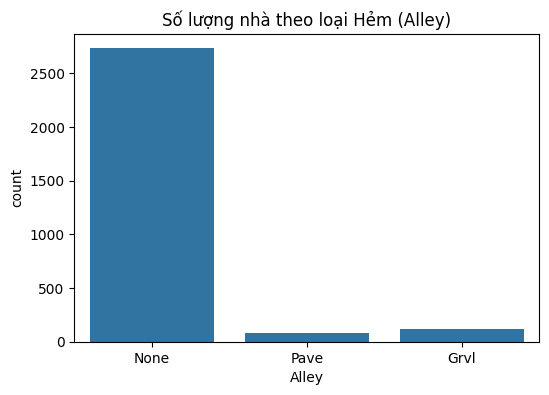


--- Thống kê Tiện ích phụ (Misc Feature) ---
Misc Feature
None    2824
Shed      95
Gar2       5
Othr       4
Elev       1
TenC       1
Name: count, dtype: int64

--- Giá bán trung bình theo tiện ích ---
Misc Feature
TenC    250000.000000
Elev    183850.000000
None    181802.141289
Othr    155625.000000
Shed    152940.621053
Gar2    147500.000000
Name: SalePrice, dtype: float64


In [195]:
# =============================================================================
# PHẦN 2: PHÂN TÍCH & TRỰC QUAN HÓA MỘT SỐ YẾU TỐ MINH HỌA (ANALYSIS & VISUALIZATION)
# =============================================================================
# 1. Phân tích cột Alley (Hẻm)
print("\n--- Phân phối cột Alley ---")
print(data['Alley'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='Alley', data=data)
plt.title('Số lượng nhà theo loại Hẻm (Alley)')
plt.show()

# 2. Phân tích cột Misc Feature (Tiện ích phụ)
print("\n--- Thống kê Tiện ích phụ (Misc Feature) ---")
print(data['Misc Feature'].value_counts())

# Tính giá bán trung bình theo từng loại tiện ích để xem cái nào đắt giá ,nhằm đánh xem giả thuyết giá nhà phụ thuộc vào các loại tiện ích có hợp lý không
misc_value = data.groupby('Misc Feature')['SalePrice'].mean().sort_values(ascending=False)
print("\n--- Giá bán trung bình theo tiện ích ---")
print(misc_value)

In [196]:
# print(data.isnull().sum().to_string())

# --- Code Mới: Kiểm tra lại toàn bộ dữ liệu để hiển thị các cột còn thiếu

# 1. Tính tổng số lượng thiếu
null_counts = data.isnull().sum()

# 2. Lọc: Chỉ lấy những cột có số lượng thiếu > 0
remaining_nulls = null_counts[null_counts > 0]

# 3. Hiển thị kết quả
if remaining_nulls.empty:
    print("Tuyệt vời! Dữ liệu đã sạch bong (0 missing values).")
else:
    print("Cảnh báo: Vẫn còn các cột sau bị thiếu dữ liệu:")
    print(remaining_nulls.sort_values(ascending=False))

Cảnh báo: Vẫn còn các cột sau bị thiếu dữ liệu:
Lot Frontage    490
Electrical        1
dtype: int64


### Lot Frontage

# 🏘️ Chiến lược xử lý Lot Frontage (Mặt tiền lô đất)

### 📊 Thống kê và Vấn đề
**Lot Frontage** (Mặt tiền) thường bị thiếu dữ liệu. Việc xử lý không chính xác biến này sẽ gây sai lệch lớn trong mô hình định giá vì đây là yếu tố ảnh hưởng trực tiếp đến giá trị thương mại của bất động sản.

---

## 🚫 1. Đánh giá phương pháp cũ (Geometric Assumption)

**Code cũ:** `np.sqrt(data['Lot Area'])`

### ⚠️ Tại sao giả định này sai thực tế?
* **Giả định hình vuông:** Cách tính này mặc định lô đất là hình vuông (Mặt tiền = Cạnh).
* **Thực tế quy hoạch:** Đất ở (đặc biệt tại Mỹ) thường được quy hoạch theo **hình chữ nhật** (Sâu và Hẹp).
    * *Ví dụ:* Một lô đất 100m² thường có kích thước 5x20m (Mặt tiền 5m). Nếu dùng căn bậc hai, mặt tiền sẽ bị tính lên thành 10m (Sai lệch gấp đôi).
* **Kết quả:** Phương pháp này làm mặt tiền bị "phóng đại" hơn thực tế, dẫn đến nhiễu dữ liệu.

---

## ✅ 2. Chiến lược mới: Điền theo đặc điểm Khu vực (Neighborhood)

**Tư duy:** Những ngôi nhà trong cùng một khu phố (Neighborhood) thường tuân theo cùng một quy chuẩn phân lô của đô thị.

> **Nguyên tắc:** Nếu một căn nhà thiếu thông tin mặt tiền, chúng ta sẽ lấy giá trị **Trung vị (Median)** của các căn nhà khác trong cùng **Neighborhood** để điền vào.

### 🛠 Code triển khai tối ưu:

```python
import pandas as pd

# 1. Nhóm theo Neighborhood và tính giá trị trung vị của LotFrontage
# Sử dụng transform để trả về một Series có cùng độ dài với dữ liệu gốc
data["Lot Frontage"] = data.groupby("Neighborhood")["Lot Frontage"].transform(
    lambda x: x.fillna(x.median())
)

# 2. Kiểm tra lại nếu còn giá trị Null (trường hợp cả khu phố đều không có data)
if data["Lot Frontage"].isnull().any():
    data["Lot Frontage"] = data["Lot Frontage"].fillna(data["Lot Frontage"].median())

print("Hoàn tất điền dữ liệu Lot Frontage theo Neighborhood.")






In [197]:
# --- XỬ LÝ DỮ LIỆU 'LOT FRONTAGE' ---
print("🚀 Bắt đầu xử lý Lot Frontage...")

# Bước 1: Điền theo khu phố
# transform(lambda x: ...) sẽ tính median của từng nhóm Neighborhood rồi điền vào ô trống của nhóm đó
data['Lot Frontage'] = data.groupby('Neighborhood')['Lot Frontage'].transform(
    lambda x: x.fillna(x.median())
)

# Bước 2: Điền nốt các dòng sót lại bằng trung vị toàn cục (Đề phòng trường hợp khu phố trắng dữ liệu)
null_count = data['Lot Frontage'].isnull().sum()
if null_count > 0:
    print(f"⚠️ Còn sót {null_count} dòng, đang xử lý bằng trung vị toàn cục...")
    data['Lot Frontage'] = data['Lot Frontage'].fillna(data['Lot Frontage'].median())

# Bước 3: Xác nhận thành công
print(f"✅ Xử lý xong. Số lượng ô trống hiện tại: {data['Lot Frontage'].isnull().sum()}")

🚀 Bắt đầu xử lý Lot Frontage...
⚠️ Còn sót 3 dòng, đang xử lý bằng trung vị toàn cục...
✅ Xử lý xong. Số lượng ô trống hiện tại: 0


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [198]:
## Tổng kiểm tra và Xử lý dứt điểm lần cuối(Final Cleanup) ---

# 1. Kiểm tra những cột còn sót lại (chỉ in những cột > 0)
null_counts = data.isnull().sum()
leftover_nulls = null_counts[null_counts > 0]

print("Các cột còn sót dữ liệu thiếu:")
print(leftover_nulls)

# 2. Xử lý các lỗi lặt vặt (thường gặp trong bộ Ames Housing)
# - Electrical (Hệ thống điện): Thiếu 1 dòng -> Điền loại phổ biến nhất (Mode)
if 'Electrical' in leftover_nulls.index:
    data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

# - Mas Vnr Area (Diện tích ốp đá): Nếu còn sót -> Điền 0
if 'Mas Vnr Area' in leftover_nulls.index:
    data['Mas Vnr Area'] = data['Mas Vnr Area'].fillna(0)

# - Các cột số khác (nếu có): Điền 0
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(0)

# - Các cột chữ khác (nếu có): Điền 'None' (hoặc Mode tùy chọn, ở đây chọn None cho an toàn)
for col in data.select_dtypes(include=['object']).columns:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna('None')

# 3. Khẳng định sạch 100%
print("\n-----------------------------------")
final_check = data.isnull().sum().sum()
if final_check == 0:
    print(f"✅ CHÚC MỪNG! Dữ liệu đã sạch 100% (Giữ nguyên {len(data)} dòng).")
else:
    print(f"⚠️ Vẫn còn {final_check} ô trống cần kiểm tra lại.")

Các cột còn sót dữ liệu thiếu:
Electrical    1
dtype: int64

-----------------------------------
✅ CHÚC MỪNG! Dữ liệu đã sạch 100% (Giữ nguyên 2930 dòng).


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [200]:
# Tạo ra một bản sao (backup) độc lập của bảng dữ liệu data
# data = data.copy()

# Group feature -> synthetic features based on domain knowledge

In [201]:
import numpy as np

# --- FEATURE ENGINEERING (TẠO BIẾN & XỬ LÝ AN TOÀN) ---
print("🚀 Đang xử lý tạo biến và làm sạch dữ liệu...")

# ==============================================================================
# 1. TẠO BIẾN MỚI (Dùng .fillna(0) để tránh lỗi cộng với NaN ra NaN)
# ==============================================================================

# 1. TotalSF (Tổng diện tích sàn)
data['TotalSF'] = (data['Total Bsmt SF'].fillna(0) + 
                   data['1st Flr SF'].fillna(0) + 
                   data['2nd Flr SF'].fillna(0))

# 2. TotalFinSF (Tổng diện tích thực dùng)
# ĐÃ SỬA LỖI: Bỏ dấu # thừa ở 'BsmtFin SF 2'
data['TotalFinSF'] = (data['Gr Liv Area'].fillna(0) + 
                      data['BsmtFin SF 1'].fillna(0) + 
                      data['BsmtFin SF 2'].fillna(0)) 

# 3. PorchSF (Tổng diện tích phụ ngoài trời)
data['PorchSF'] = (data['Open Porch SF'].fillna(0) + 
                   data['Enclosed Porch'].fillna(0) + 
                   data['3Ssn Porch'].fillna(0) + 
                   data['Screen Porch'].fillna(0))

# 4. TotalBath (Tổng số phòng tắm)
data['TotalBath'] = (data['Full Bath'].fillna(0) + 
                     0.5 * data['Half Bath'].fillna(0) + 
                     data['Bsmt Full Bath'].fillna(0) + 
                     0.5 * data['Bsmt Half Bath'].fillna(0))

# 5. Age (Tuổi thọ nhà)
data['Age'] = data['Yr Sold'] - data['Year Built']

# 6. Bsmt_Fin_Ratio (Tỷ lệ hầm hoàn thiện)
data['Bsmt_Fin_Ratio'] = np.where(data['TotalSF'] > 0,
                                  data['TotalFinSF'] / data['TotalSF'],
                                  0)

# ==============================================================================
# 2. KIỂM TRA & BÁO CÁO (VALIDATION LOOP)
# ==============================================================================
new_features = ['TotalSF', 'TotalFinSF', 'PorchSF', 'TotalBath', 'Age', 'Bsmt_Fin_Ratio']
print("\n--- Báo cáo kiểm tra các biến mới ---")

for feature in new_features:
    null_count = data[feature].isnull().sum()
    if null_count == 0:
        print(f"✅ {feature}: Sạch sẽ (0 NaN)")
    else:
        print(f"⚠️ {feature}: Còn sót {null_count} dòng bị NaN -> Cần xử lý thêm!")
        if feature == 'Age':
            median_age = data['Age'].median()
            data['Age'] = data['Age'].fillna(median_age)
            print(f"   -> Đã tự động điền tuổi trung bình ({median_age}) vào ô trống.")

# ==============================================================================
# 3. DỌN DẸP
# ==============================================================================
drop_cols = ['Order', 'PID'] # # Xóa cột ID và Order vì không dùng dự báo
data = data.drop(columns=drop_cols, errors='ignore')

print(f"\n✅ Hoàn tất! Kích thước dữ liệu hiện tại: {data.shape}")
print(data[new_features].head())

🚀 Đang xử lý tạo biến và làm sạch dữ liệu...



--- Báo cáo kiểm tra các biến mới ---
✅ TotalSF: Sạch sẽ (0 NaN)
✅ TotalFinSF: Sạch sẽ (0 NaN)
✅ PorchSF: Sạch sẽ (0 NaN)
✅ TotalBath: Sạch sẽ (0 NaN)
✅ Age: Sạch sẽ (0 NaN)
✅ Bsmt_Fin_Ratio: Sạch sẽ (0 NaN)

✅ Hoàn tất! Kích thước dữ liệu hiện tại: (2930, 86)
   TotalSF  TotalFinSF  PorchSF  TotalBath  Age  Bsmt_Fin_Ratio
0   2736.0      2295.0       62        2.0   50        0.838816
1   1778.0      1508.0      120        1.0   49        0.848144
2   2658.0      2252.0       36        1.5   52        0.847254
3   4220.0      3175.0        0        3.5   42        0.752370
4   2557.0      2420.0       34        2.5   13        0.946422


## Ordinal Encoding (Mã hóa thứ tự -gán các con số theo một thứ tự tăng dần về giá trị (Chất lượng)) 

In [202]:
# ---  Chấm điểm chất lượng (Ordinal Encoding) ---

# 1. Định nghĩa thang điểm
# Code cũ thường thiếu 'None'. Cần bổ sung thêm vào để máy hiểu "Không có" = 0 điểm.
qual_map = {
    'Ex': 5,      # Excellent (Xuất sắc)
    'Gd': 4,      # Good (Tốt)
    'TA': 3,      # Typical/Average (Trung bình)
    'Fa': 2,      # Fair (Khá)
    'Po': 1,      # Poor (Kém)
    'None': 0,    # Không có tiện ích này (QUAN TRỌNG)
    'No': 0,      # Dự phòng cho trường hợp còn sót chữ "No"
    'NA': 0       # Dự phòng
}

# 2. Danh sách các cột cần chấm điểm
# Bổ sung thêm Pool QC, Fireplace Qu... những cột mà code cũ đã xóa
ord_cols = [
    'Exter Qual', 'Exter Cond',      # Ngoại thất
    'Bsmt Qual', 'Bsmt Cond',        # Tầng hầm
    'Heating QC',                    # Lò sưởi chính
    'Kitchen Qual',                  # Bếp
    'Fireplace Qu',                  # Lò sưởi tường
    'Garage Qual', 'Garage Cond',    # Nhà xe
    'Pool QC'                        # Hồ bơi
]

# 3. Thực hiện chuyển đổi
print("Đang chuyển đổi dữ liệu chữ sang số...")
for col in ord_cols:
    # Kiểm tra xem cột có trong data không (tránh lỗi KeyError)
    if col in data.columns:
        # map() sẽ thay thế chữ bằng số tương ứng
        data[col] = data[col].map(qual_map)
        
        # Lấp các giá trị không có trong map bằng 0 (để an toàn tuyệt đối)
        data[col] = data[col].fillna(0)

print("Đã xong! Kiểm tra thử cột Kitchen Qual:")
print(data['Kitchen Qual'].value_counts())

Đang chuyển đổi dữ liệu chữ sang số...
Đã xong! Kiểm tra thử cột Kitchen Qual:
Kitchen Qual
3    1494
4    1160
5     205
2      70
1       1
Name: count, dtype: int64


# EDA 
## (Exploratory Data Analysis (Phân tích khám phá dữ liệu) ):

Mục tiêu của EDA là dùng các công cụ thống kê và biểu đồ để:

Hiểu cấu trúc: Dữ liệu có bao nhiêu dòng, cột, kiểu dữ liệu gì.

Tìm quy luật: Cái gì làm cho giá nhà tăng? (Ví dụ: Diện tích càng lớn thì giá càng cao).

Phát hiện bất thường (Outliers): Những căn nhà có diện tích siêu lớn nhưng giá lại siêu rẻ (có thể là dữ liệu lỗi).

Kiểm tra giả thuyết: Những yếu tố ta nghĩ là quan trọng (như số phòng ngủ) có thực sự ảnh hưởng đến giá không?

--- Top 20 yếu tố ảnh hưởng mạnh nhất đến Giá nhà ---
SalePrice         1.000000
Overall Qual      0.799262
TotalSF           0.793127
TotalFinSF        0.731478
Gr Liv Area       0.706780
Exter Qual        0.697970
Kitchen Qual      0.672914
Garage Cars       0.647562
Garage Area       0.640138
TotalBath         0.636175
Total Bsmt SF     0.632529
1st Flr SF        0.621676
Bsmt Qual         0.607532
Year Built        0.558426
Full Bath         0.545604
Fireplace Qu      0.533901
Year Remod/Add    0.532974
Mas Vnr Area      0.502196
TotRms AbvGrd     0.495474
Fireplaces        0.474558
Heating QC        0.450325
Name: SalePrice, dtype: float64


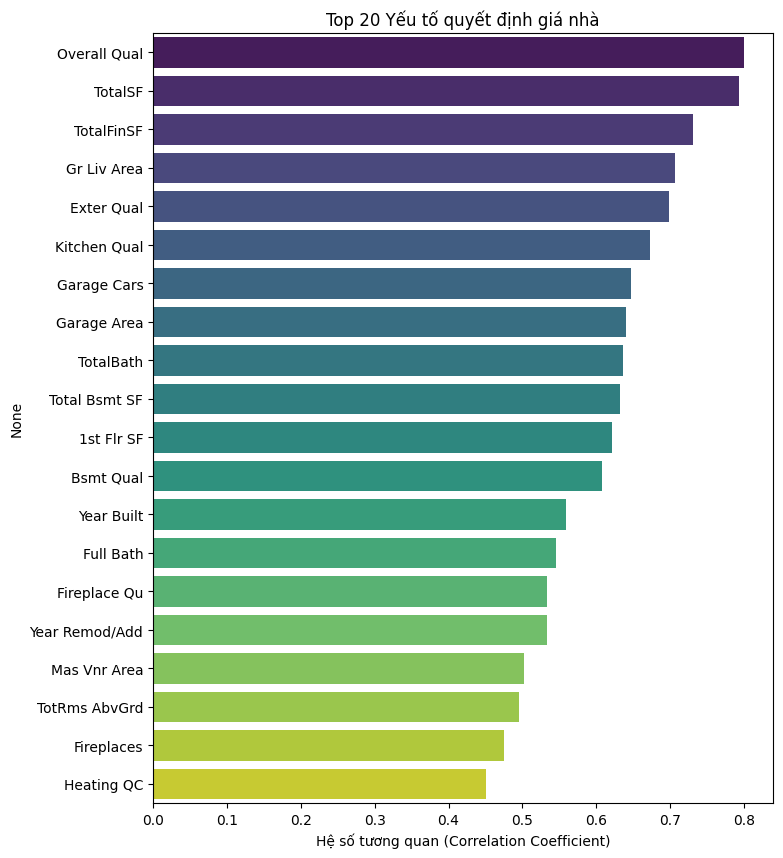

In [203]:
# --- TÍNH TOÁN MỨC ĐỘ ẢNH HƯỞNG (CORRELATION) ---

# 1. Tính ma trận tương quan giữa các biến số
# Lưu ý quan trọng: Phải thêm numeric_only=True để tránh lỗi với các cột dữ liệu chữ (Text)
corr_matrix = data.corr(numeric_only=True)

# 2. Lấy danh sách độ tương quan với cột Giá nhà (SalePrice)
# Sắp xếp giảm dần (Cao nhất ở trên)
corre_fea = corr_matrix['SalePrice'].sort_values(ascending=False)

# 3. In ra Top 21 (Bao gồm chính nó và 20 yếu tố khác)
print("--- Top 20 yếu tố ảnh hưởng mạnh nhất đến Giá nhà ---")
print(corre_fea.head(21))

# --- (MỞ RỘNG) TRỰC QUAN HÓA CHO ĐẸP ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 10))
# Lấy Top 20 (bỏ dòng đầu tiên là SalePrice vì nó luôn là 1)
top_features = corre_fea.iloc[1:21] 
sns.barplot(x=top_features.values, y=top_features.index,hue=top_features.index, palette='viridis',legend =False)
plt.title('Top 20 Yếu tố quyết định giá nhà')
plt.xlabel('Hệ số tương quan (Correlation Coefficient)')
plt.show()

Note: According to some info of artical related to real estate so
- RL can be Residential Low Density
- RM can be Residential Medium Density
- RH can be Residential High Density
- FV can be Floating Village
- C can be Commercial
- I can be Industrial
- A can be Agricultural

In [204]:
zoning_map = {
    'RL': 'Residential Low Density (Mật độ thấp)',
    'RM': 'Residential Medium Density (Mật độ trung bình)',
    'RH': 'Residential High Density (Mật độ cao)',
    'FV': 'Floating Village (Làng nổi)',
    'C (all)': 'Commercial (Thương mại)',
    'I': 'Industrial (Công nghiệp)',
    'A': 'Agricultural (Nông nghiệp)'
}


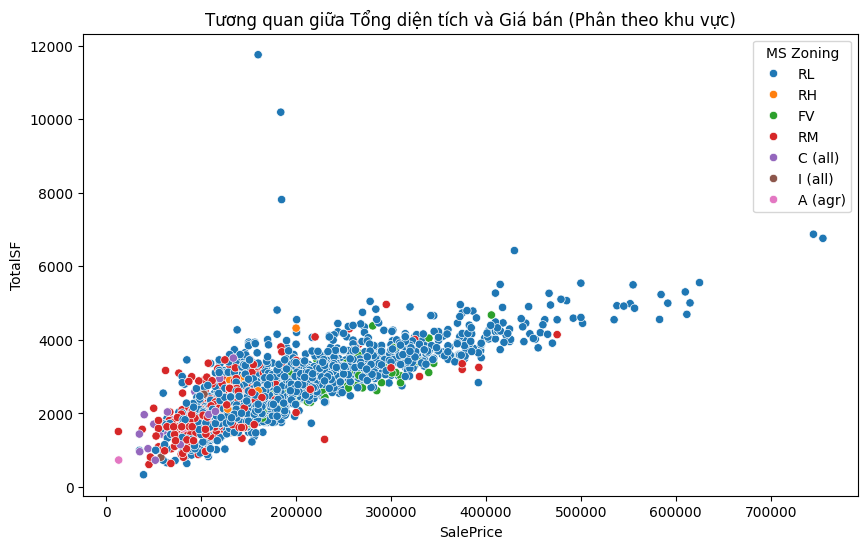

In [205]:

plt.figure(figsize=(10, 6))

sns.scatterplot(data=data, x='SalePrice', y='TotalSF', hue='MS Zoning')

plt.title('Tương quan giữa Tổng diện tích và Giá bán (Phân theo khu vực)')
plt.show()

Phát hiện 3 căn nhà ngoại lai cần loại bỏ:
      TotalSF  SalePrice Neighborhood
1498  11752.0     160000      Edwards
2180  10190.0     183850      Edwards
2181   7814.0     184750      Edwards

Đã xóa xong. Biểu đồ sạch sẽ trông như thế này:


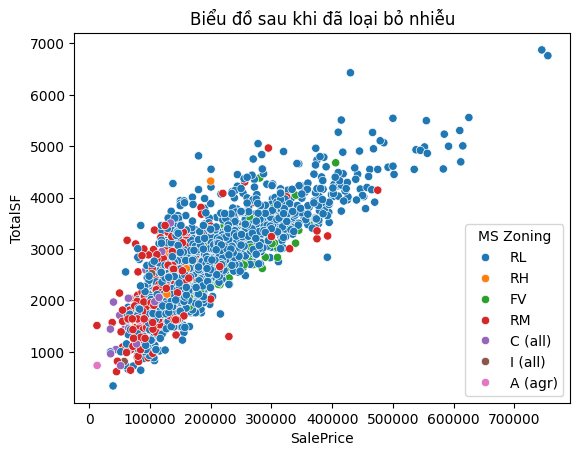

In [206]:
# --- Loại bỏ Outliers (Ngoại lai) ---

# 1. Xác định các căn nhà "dị biệt"
# Điều kiện: Diện tích siêu to (> 7500) NHƯNG Giá lại rẻ (< 300,000)
# Lưu ý: Ngưỡng 7500 này dựa trên quan sát biểu đồ TotalSF
outliers = data[(data['TotalSF'] > 7500) & (data['SalePrice'] < 300000)]

print(f"Phát hiện {len(outliers)} căn nhà ngoại lai cần loại bỏ:")
print(outliers[['TotalSF', 'SalePrice', 'Neighborhood']])

# 2. Loại bỏ chúng khỏi tập dữ liệu
# Dùng index để xóa chính xác
data = data.drop(outliers.index)

# 3. Vẽ lại để tận hưởng thành quả
print("\nĐã xóa xong. Biểu đồ sạch sẽ trông như thế này:")
sns.scatterplot(data=data, x='SalePrice', y='TotalSF', hue='MS Zoning')
plt.title("Biểu đồ sau khi đã loại bỏ nhiễu")
plt.show()

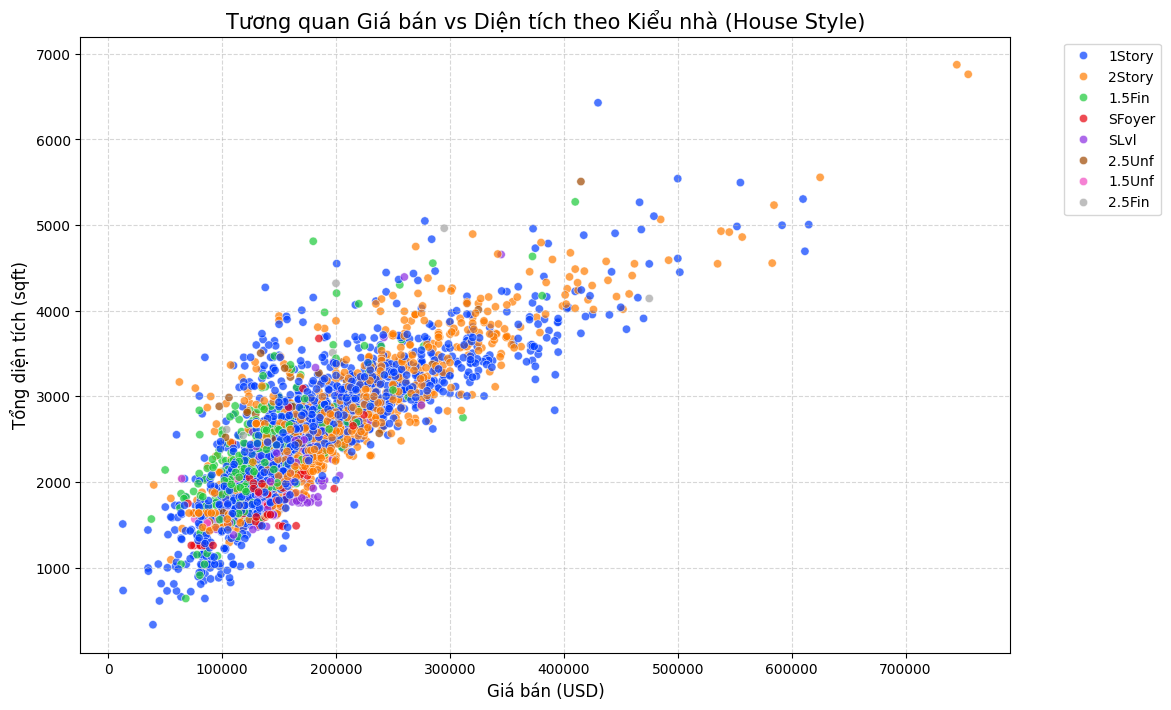

In [207]:

plt.figure(figsize=(12, 8)) 

# Vẽ biểu đồ Scatter
sns.scatterplot(data=data, 
                x='SalePrice', 
                y='TotalSF', 
                hue='House Style',
                palette='bright', # Dùng bảng màu tươi sáng cho dễ phân biệt
                alpha=0.7)        # Độ trong suốt 0.7 để nhìn thấy các điểm đè lên nhau

plt.title('Tương quan Giá bán vs Diện tích theo Kiểu nhà (House Style)', fontsize=15)
plt.xlabel('Giá bán (USD)', fontsize=12)
plt.ylabel('Tổng diện tích (sqft)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Đưa chú thích ra ngoài cho đỡ che hình
plt.grid(True, linestyle='--', alpha=0.5) # Thêm lưới mờ cho dễ gióng số
plt.show()

Note:
- 1Story - 1 tầng
- 2Story - 2 tầng
- 1.5Fin - 1 tầng có gác mái hoàn thiện
- 1.5Unf - 1 tầng có gác mái chưa hoàn thiện
- 2.5Fin- 2 tầng có gác mái hoàn thiện
- 2.5Unf - 2 tầng có gác mái chưa hoàn thiện
- SFoyer - nhà kiểu 1 tầng nhưng có cầu thang trong nhà tạo thành 2 tầng
- SLvl - nhà bên trong có các tầng chằng chéo

<Axes: xlabel='SalePrice', ylabel='TotalSF'>

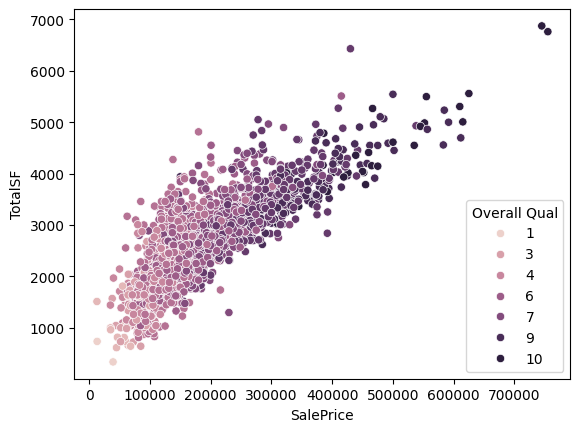

In [208]:
# Biểu đồ phân tán (Scatter Plot) giúp bạn nhìn thấy mối quan hệ giữa 3 yếu tố cùng một lúc: Giá tiền, Diện tích và Chất lượng nhà.
sns.scatterplot(data = data, x = 'SalePrice', y = 'TotalSF', hue = 'Overall Qual')

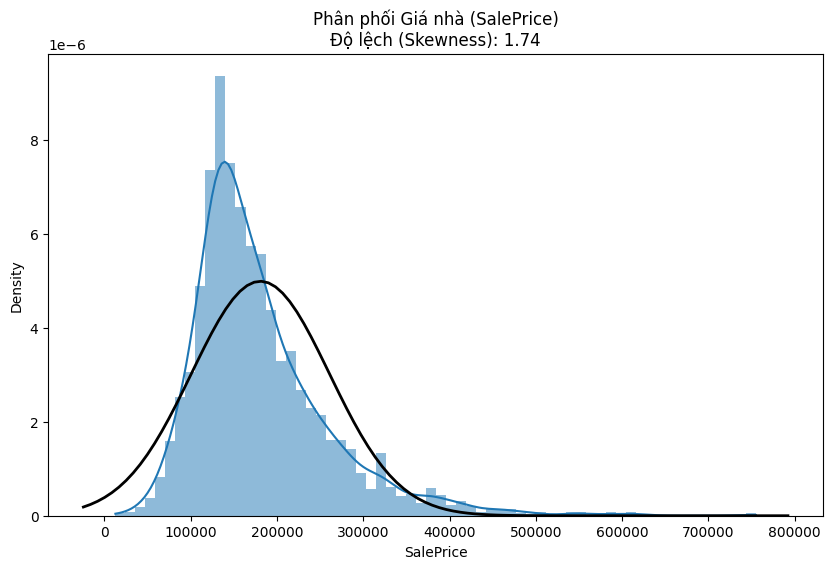

In [209]:
# --- Kiểm tra phân phối của Giá nhà ---
from scipy.stats import norm

# 1. Vẽ biểu đồ Histogram (Biểu đồ tần suất)
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True, stat="density", linewidth=0)

# 2. Vẽ đường cong chuẩn (Normal Distribution) để so sánh
# Mục đích: Xem hình "chuông" thực tế (màu xanh) lệch thế nào so với hình "chuông" lý tưởng (màu đen)
mu, std = norm.fit(data['SalePrice'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title(f"Phân phối Giá nhà (SalePrice)\nĐộ lệch (Skewness): {data['SalePrice'].skew():.2f}")
plt.show()

Xử lý biến mục tiêu (Target Transformation): Biểu đồ  cho thấy SalePrice bị lệch phải (right-skewed). Các mô hình Linear Regression hoạt động kém với dữ liệu này. Hãy dùng hàm Log-transformation (np.log1p(y)) cho biến mục tiêu trước khi train, và dùng np.expm1 để giải mã kết quả dự đoán. Điều này sẽ giảm sai số đáng kể cho các căn nhà giá trị cao.

Độ lệch trước khi xử lý: 1.74
Độ lệch sau khi xử lý: -0.01


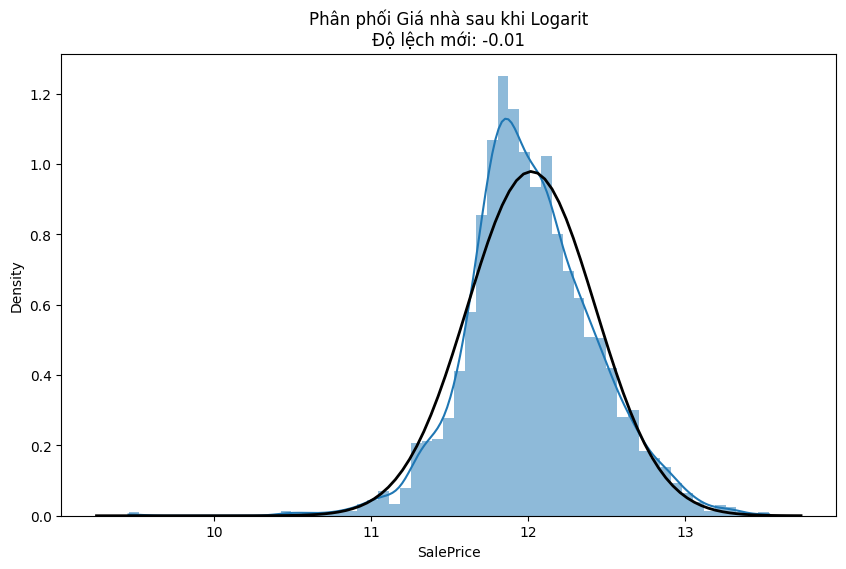

In [210]:
# --- Code Mới: Chuẩn hóa dữ liệu bằng Logarit ---
import numpy as np

print(f"Độ lệch trước khi xử lý: {data['SalePrice'].skew():.2f}")

# 1. Áp dụng hàm log1p (log(1+x)) để tránh lỗi log(0)
# Biến đổi này giúp co ngắn cái đuôi dài bên phải lại
data['SalePrice'] = np.log1p(data['SalePrice'])

# 2. Kiểm tra lại độ lệch
new_skew = data['SalePrice'].skew()
print(f"Độ lệch sau khi xử lý: {new_skew:.2f}")

# 3. Vẽ lại biểu đồ phân phối để ngắm thành quả
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True, stat="density", linewidth=0)
mu, std = norm.fit(data['SalePrice'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title(f"Phân phối Giá nhà sau khi Logarit\nĐộ lệch mới: {new_skew:.2f}")
plt.show()

In [ ]:
# data['Neighborhood']
# --- One-Hot Encoding (Biến đổi chữ thành số 0-1) ---
import pandas as pd

print(f"Số lượng cột hiện tại: {data.shape[1]}")

# Lệnh tự động tìm tất cả các cột còn là chữ (object) và xé nhỏ chúng ra:  pd.get_dummies
# drop_first=True: Giúp loại bỏ các cột thừa (Tránh bẫy đa cộng tuyến)
final_data = pd.get_dummies(data, drop_first=True)

print(f"Số lượng cột sau khi xử lý: {final_data.shape[1]}")

# Kiểm tra xem còn chữ nào sót lại không (Nếu output là rỗng -> Thành công 100%)
print("Các kiểu dữ liệu còn lại (ngoài số):")
print(final_data.select_dtypes(include=['object']).columns.tolist())

# Xem thử 5 dòng đầu của dữ liệu "thành phẩm"
final_data.head()  

Số lượng cột hiện tại: 86
Số lượng cột sau khi xử lý: 246
Các kiểu dữ liệu còn lại (ngoài số):
[]


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.0,31770,6,5,1960,1960,112.0,3,3,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,11622,5,6,1961,1961,0.0,3,3,...,False,False,False,False,True,False,False,False,True,False
2,20,81.0,14267,6,6,1958,1958,108.0,3,3,...,False,False,False,False,True,False,False,False,True,False
3,20,93.0,11160,7,5,1968,1968,0.0,4,3,...,False,False,False,False,True,False,False,False,True,False
4,60,74.0,13830,5,5,1997,1998,0.0,3,3,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
# Create Total_Qua to determine sum of quality of every aspect in a house
data['Total_Qua'] = (data['Overall Qual'] + 
                             data['Exter Qual'] + 
                             data['Kitchen Qual'] + 
                             data['Bsmt Qual'] + 
                             data['Garage Qual'])

# Kiểm tra thử xem nhà nào chất lượng cao nhất (Điểm cao nhất)
print("Top 5 căn nhà có điểm chất lượng cao nhất:")
print(data[['Total_Qua', 'SalePrice']].sort_values(by='Total_Qua', ascending=False).head())

Top 5 căn nhà có điểm chất lượng cao nhất:
      Total_Qua  SalePrice
523          28  12.644331
456          28  13.221305
430          28  12.906349
1051         28  12.962197
1052         28  12.861001


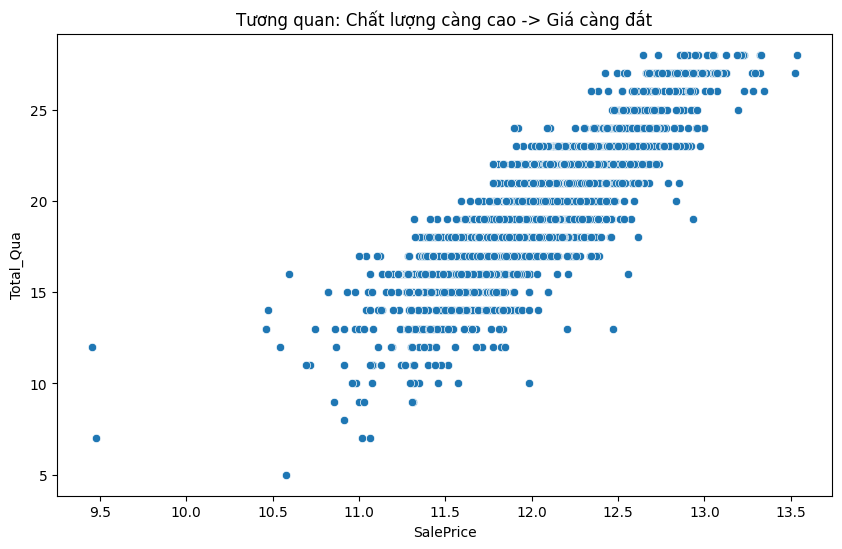

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ tương quan giữa Giá nhà và Tổng điểm chất lượng
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='SalePrice', y='Total_Qua')
plt.title('Tương quan: Chất lượng càng cao -> Giá càng đắt')
plt.show()

In [ ]:
# Tính tuổi đời của ngôi nhà tại thời điểm bán
data['Age'] = data['Yr Sold'] - data['Year Built']

# Kiểm tra xem có nhà nào bị lỗi "Tuổi âm" không
print(data['Age'].describe())

# Xem mẫu 5 dòng
print("\n5 dòng đầu của cột Age:")
print(data['Age'].head())

Thống kê biến Age:
count    2927.000000
mean       36.471814
std        30.283980
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: Age, dtype: float64

5 dòng đầu của cột Age:
0    50
1    49
2    52
3    42
4    13
Name: Age, dtype: int64


<Axes: xlabel='SalePrice', ylabel='Age'>

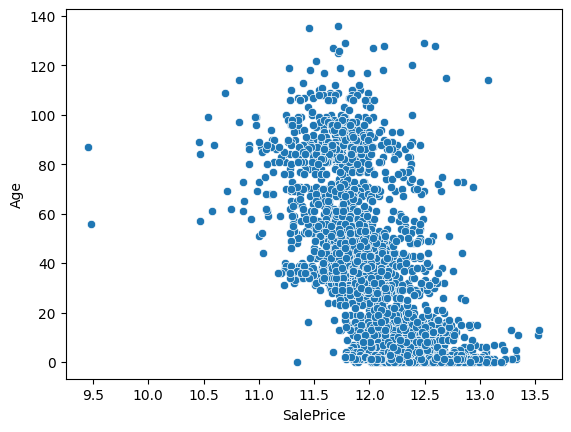

In [215]:
sns.scatterplot(data = data, x = 'SalePrice', y = 'Age')

In [216]:
# Xem thống kê mô tả của các biến số
data.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,...,Mo Sold,Yr Sold,SalePrice,TotalSF,TotalFinSF,PorchSF,TotalBath,Age,Bsmt_Fin_Ratio,Total_Qua
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,...,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,57.398360,69.341305,10109.374786,6.090878,5.563717,1971.319098,1984.241886,100.250085,3.396994,3.085412,...,6.215237,2007.790912,12.020918,2538.713017,1984.579775,88.827127,2.215750,36.471814,0.784690,19.276392
std,42.654221,21.200577,7782.875751,1.406195,1.111960,30.238491,20.856725,176.626875,0.578344,0.371878,...,2.712368,1.317120,0.407783,767.575344,722.755822,107.316278,0.804975,30.283980,0.154721,3.342052
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.000000,1.000000,...,1.000000,2006.000000,9.456419,334.000000,334.000000,0.000000,1.000000,0.000000,0.474565,5.000000
25%,20.000000,60.000000,7439.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,3.000000,3.000000,...,4.000000,2007.000000,11.771444,2000.000000,1491.000000,0.000000,1.500000,7.000000,0.666667,17.000000
50%,50.000000,70.000000,9430.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,3.000000,3.000000,...,6.000000,2008.000000,11.982935,2448.000000,1850.000000,50.000000,2.000000,34.000000,0.814343,19.000000
75%,70.000000,80.000000,11523.000000,7.000000,6.000000,2000.500000,2004.000000,162.000000,4.000000,3.000000,...,8.000000,2009.000000,12.271397,2988.500000,2377.000000,135.500000,2.500000,54.000000,0.909429,22.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.000000,5.000000,...,12.000000,2010.000000,13.534474,6872.000000,6572.000000,1207.000000,7.000000,136.000000,1.320312,28.000000


### Divide data into 2 dataset include: include object and exclude object

Tách dữ liệu thành 2 phần riêng biệt:

data_num: Chỉ chứa các cột số (Diện tích, Giá, Tuổi...).

data_ob: Chỉ chứa các cột chữ (Khu phố, Kiểu nhà...).

In [217]:
# Divide data into 2 dataset include: include object and exclude object

data_num = data.select_dtypes(include=['int64', 'float64'])
data_ob = data.select_dtypes(include=['object'])

In [218]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 2929
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2927 non-null   int64  
 1   Lot Frontage     2927 non-null   float64
 2   Lot Area         2927 non-null   int64  
 3   Overall Qual     2927 non-null   int64  
 4   Overall Cond     2927 non-null   int64  
 5   Year Built       2927 non-null   int64  
 6   Year Remod/Add   2927 non-null   int64  
 7   Mas Vnr Area     2927 non-null   float64
 8   Exter Qual       2927 non-null   int64  
 9   Exter Cond       2927 non-null   int64  
 10  Bsmt Qual        2927 non-null   int64  
 11  Bsmt Cond        2927 non-null   int64  
 12  BsmtFin SF 1     2927 non-null   float64
 13  BsmtFin SF 2     2927 non-null   float64
 14  Bsmt Unf SF      2927 non-null   float64
 15  Total Bsmt SF    2927 non-null   float64
 16  Heating QC       2927 non-null   int64  
 17  1st Flr SF       29

In [219]:
corr_df = data_num.corr()
corr_df

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,...,Mo Sold,Yr Sold,SalePrice,TotalSF,TotalFinSF,PorchSF,TotalBath,Age,Bsmt_Fin_Ratio,Total_Qua
MS SubClass,1.000000,-0.412840,-0.206403,0.040296,-0.067498,0.036924,0.043740,0.005423,0.017776,-0.055256,...,0.000780,-0.018081,-0.070684,-0.079714,-0.004117,-0.057368,0.156799,-0.037655,0.142720,0.014756
Lot Frontage,-0.412840,1.000000,0.369541,0.193840,-0.056462,0.118601,0.082782,0.204039,0.139407,-0.002593,...,0.012487,-0.007522,0.355085,0.384650,0.344870,0.138711,0.191704,-0.118750,0.032866,0.191727
Lot Area,-0.206403,0.369541,1.000000,0.085068,-0.032704,0.017612,0.016274,0.106740,0.046709,0.005486,...,0.004831,-0.022205,0.257915,0.288222,0.292669,0.099323,0.172833,-0.018551,0.071674,0.089466
Overall Qual,0.040296,0.193840,0.085068,1.000000,-0.093755,0.596406,0.568961,0.416475,0.732220,0.006065,...,0.030443,-0.019815,0.828533,0.669101,0.543213,0.122284,0.541081,-0.596372,-0.055866,0.918225
Overall Cond,-0.067498,-0.056462,-0.032704,-0.093755,1.000000,-0.368470,0.048319,-0.131633,-0.151480,0.404210,...,-0.007155,0.031035,-0.048229,-0.171900,-0.098601,0.034157,-0.188994,0.369267,0.072753,-0.118731
Year Built,0.036924,0.118601,0.017612,0.596406,-0.368470,1.000000,0.611544,0.304898,0.604863,-0.091565,...,0.014263,-0.012783,0.615786,0.390795,0.327468,-0.120607,0.537576,-0.999054,0.026871,0.692021
Year Remod/Add,0.043740,0.082782,0.016274,0.568961,0.048319,0.611544,1.000000,0.188584,0.605447,0.090177,...,0.017723,0.033093,0.586403,0.372819,0.291785,0.001190,0.458366,-0.609186,-0.037550,0.642326
Mas Vnr Area,0.005423,0.204039,0.106740,0.416475,-0.131633,0.304898,0.188584,1.000000,0.354281,-0.007558,...,-0.004620,-0.015220,0.447514,0.452958,0.424140,0.047024,0.319099,-0.305102,0.068769,0.408498
Exter Qual,0.017776,0.139407,0.046709,0.732220,-0.151480,0.604863,0.605447,0.354281,1.000000,0.029797,...,0.026775,-0.000915,0.687158,0.534663,0.413584,0.077833,0.467843,-0.603994,-0.077045,0.824472
Exter Cond,-0.055256,-0.002593,0.005486,0.006065,0.404210,-0.091565,0.090177,-0.007558,0.029797,1.000000,...,0.006163,0.016936,0.060313,-0.015590,0.043464,0.041724,0.011488,0.092164,0.091678,0.028572


#### Note:
- It's extremely difficult to realize pair of feature which have correlation with each other.
-> Next step: Fillter really important features that have strong correlation with SalePrice col.

In [ ]:
# Top 20 yếu tố ảnh hưởng nhất
print(corre_fea.head(21))

SalePrice         1.000000
Overall Qual      0.799262
TotalSF           0.793127
TotalFinSF        0.731478
Gr Liv Area       0.706780
Exter Qual        0.697970
Kitchen Qual      0.672914
Garage Cars       0.647562
Garage Area       0.640138
TotalBath         0.636175
Total Bsmt SF     0.632529
1st Flr SF        0.621676
Bsmt Qual         0.607532
Year Built        0.558426
Full Bath         0.545604
Fireplace Qu      0.533901
Year Remod/Add    0.532974
Mas Vnr Area      0.502196
TotRms AbvGrd     0.495474
Fireplaces        0.474558
Heating QC        0.450325
Name: SalePrice, dtype: float64


Danh sách 21 biến được chọn để vẽ:
['SalePrice', 'Total_Qua', 'Overall Qual', 'TotalSF', 'TotalFinSF', 'Gr Liv Area', 'Exter Qual', 'Garage Cars', 'Kitchen Qual', 'TotalBath', 'Garage Area', 'Total Bsmt SF', 'Bsmt Qual', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Fireplace Qu', 'TotRms AbvGrd', 'Heating QC', 'Fireplaces']


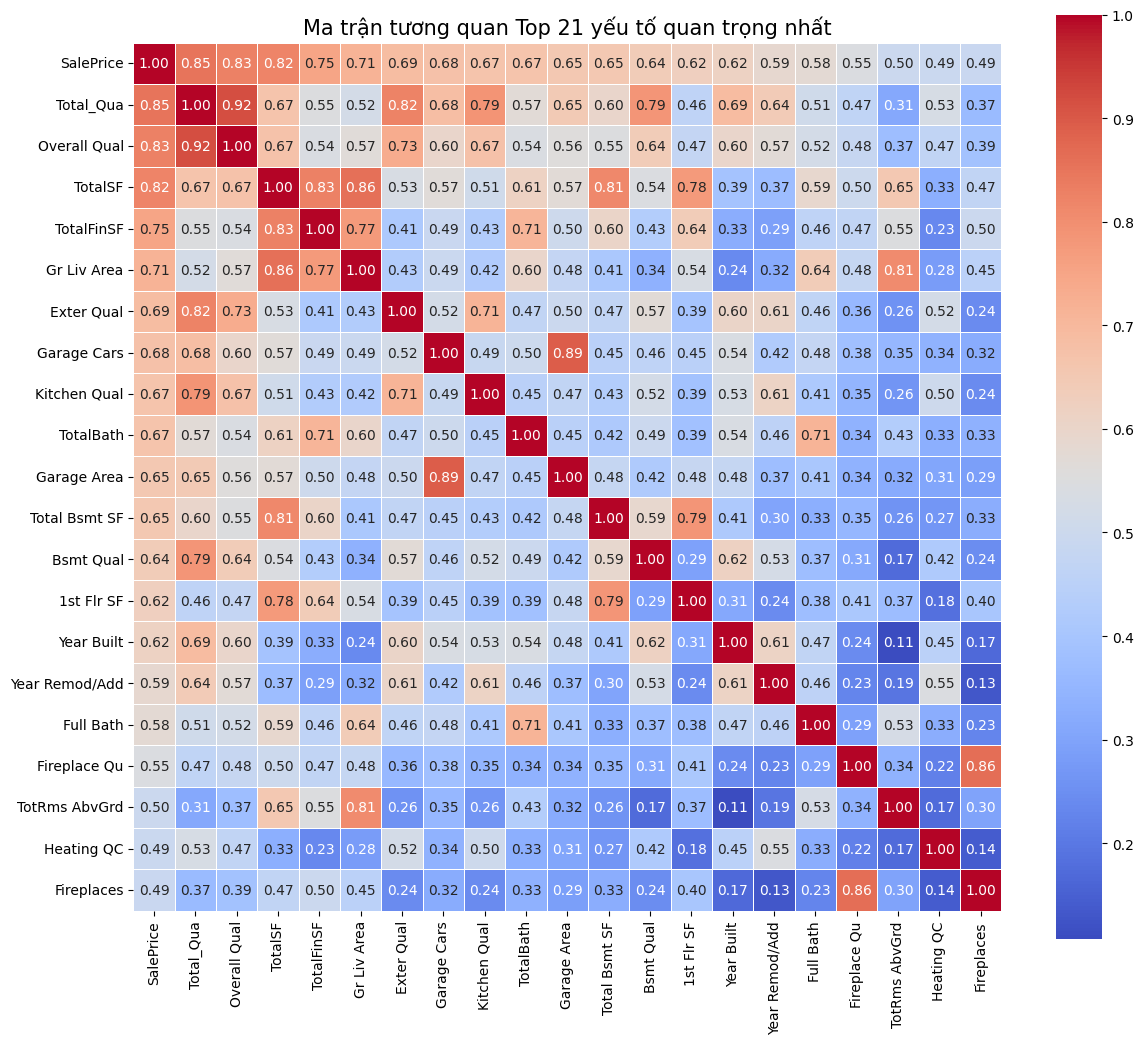

In [ ]:


# --- 1: TẠO DANH SÁCH 21 BIẾN QUAN TRỌNG NHẤT (top_fea) ---

# Tính ma trận tương quan (chỉ tính trên cột số)
corr_matrix = data.corr(numeric_only=True)

# Dùng hàm nlargest để lấy ra 21 cột có tương quan cao nhất với SalePrice
# .index sẽ lấy ra danh sách tên cột
top_fea = corr_matrix.nlargest(21, 'SalePrice')['SalePrice'].index

print("Danh sách 21 biến được chọn để vẽ:")
print(list(top_fea))


# --- 2: VẼ HEATMAP ---
plt.figure(figsize=(14, 12)) # Tăng kích thước lên chút cho số đỡ bị đè

# Lưu ý: Mình thay 'data_num' bằng 'data' luôn cho tiện (vì mình đã chọn cột trong top_fea rồi)
sns.heatmap(data[top_fea].corr(), 
            annot=True,     # Hiện con số
            fmt=".2f",      # Làm tròn 2 số thập phân
            cmap='coolwarm',# Màu Xanh (Lạnh) - Đỏ (Nóng)
            square=True,    # Ép các ô thành hình vuông
            linewidths=0.5) # Đường kẻ trắng giữa các ô

plt.title('Ma trận tương quan Top 21 yếu tố quan trọng nhất', fontsize=15)
plt.show()

Pair of features has strong correlation with each other:
- Overall Qual : Total_Qua
- Bmst_Fin_SF : Total Bsmt SF
- Bsmt_Fin_SF : BsmtFin SF 1
- Bsmt_Fin_SF : Bsmt_Fin_Ratio
- TotalSF : Gr Liv Area
- TotalSF : TotalFinSF

most of features seem to invole each other. It's mean that most factors of the house were considered before construction began so if any one factor increases, it will cause other factors to increase and vice versa.

Next step: Using Machine learning algorithms supports.

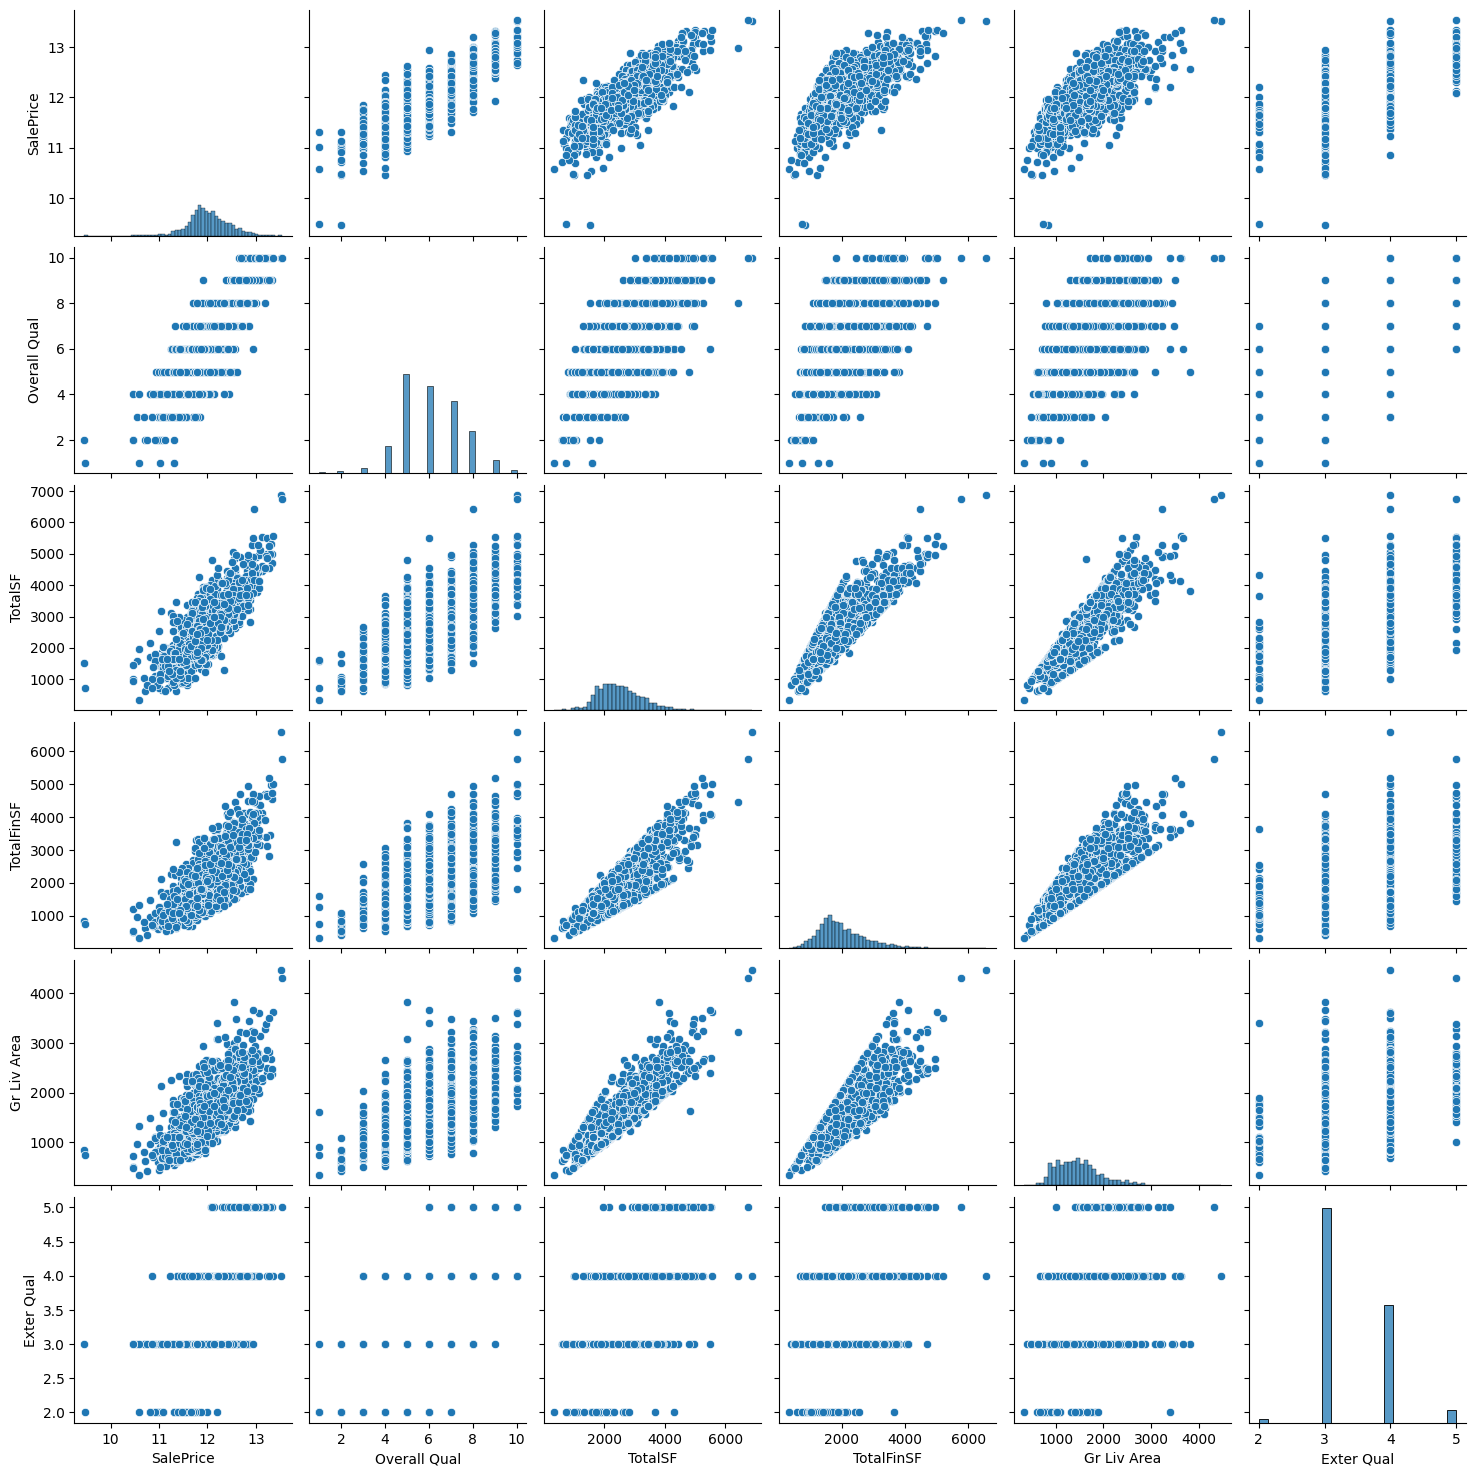

In [222]:
# Chỉ vẽ pairplot cho 6 biến quan trọng nhất để dễ nhìn
sns.pairplot(data_num[corre_fea.index[0:6]])
plt.show()

<Axes: xlabel='SalePrice', ylabel='Count'>

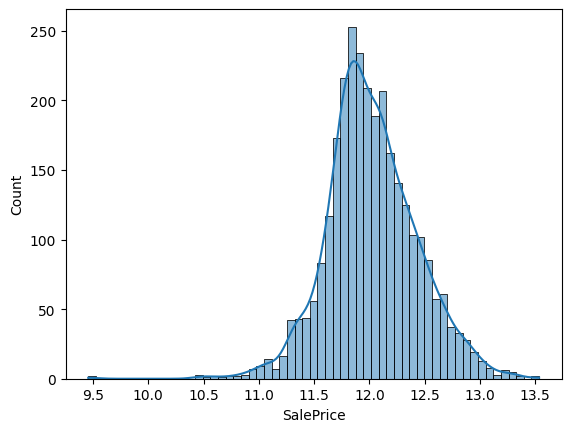

In [223]:
# kiểm tra lại lần cuối biến mục tiêu SalePrice trong tập dữ liệu số data_num
sns.histplot(data = data_num, x = 'SalePrice', kde = True)

code cũ: 
x = data_num.drop(columns = ['SalePrice'])

y = data_num['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Mô hình sẽ bỏ qua hoàn toàn các thông tin dạng chữ mà chúng ta đã xử lý (như Neighborhood - Khu phố, MS Zoning - Quy hoạch...).

Ví dụ: Nhà ở khu phố "nhà giàu" (NoRidge) thường đắt hơn, nhưng nếu dùng data_num, máy tính sẽ không biết nhà đó ở đâu.



 Nên thay data_num bằng final_data (bảng dữ liệu tổng hợp đã One-Hot Encoding mà chúng ta tạo ở các bước trước).


In [ ]:
from sklearn.model_selection import train_test_split
# 1. Tách Biến đầu vào (Features) và Biến mục tiêu (Target)
# Nếu chỉ dùng 'data_num' -> Tức là chỉ dùng các CỘT SỐ để dự đoán
# Ở đây dùng final data
X = final_data.drop(columns = ['SalePrice']) 
y = final_data['SalePrice']

# 2. Chia tập huấn luyện (Train) và tập kiểm tra (Test)
# Test size = 0.2 (20% để thi, 80% để học)
# Random state = 42 (Để kết quả ổn định, chạy lại lần sau vẫn y hệt)
from sklearn.model_selection import train_test_split # Nhớ import dòng này
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 3. Xem dữ liệu
X_train

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
2262,20,89.0,10991,8,5,2007,2007,80.0,4,3,...,False,True,False,False,False,False,False,False,False,True
1678,160,24.0,2016,5,5,1970,1970,304.0,3,3,...,False,False,False,False,True,False,False,False,True,False
2778,60,95.0,13450,7,5,2002,2002,0.0,4,3,...,False,False,False,False,True,False,False,False,True,False
2506,160,30.0,3180,7,5,2005,2005,0.0,3,3,...,False,False,False,False,True,False,False,False,True,False
1088,60,51.0,8029,6,5,2005,2005,0.0,3,3,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,120,61.0,8035,9,5,2006,2006,165.0,4,3,...,False,False,False,False,True,False,False,False,True,False
1095,60,64.0,7750,7,5,2002,2002,0.0,4,3,...,False,False,False,False,True,False,False,False,True,False
1130,60,64.0,8791,6,5,2003,2003,0.0,4,3,...,False,False,False,False,True,False,False,False,True,False
1294,50,81.0,7308,5,5,1920,1950,0.0,2,2,...,False,False,False,False,True,False,False,False,True,False


### Build model DecisionTreeRegressor -> find important Features

In [230]:
from sklearn.tree import DecisionTreeRegressor

# 1. Khởi tạo mô hình
# max_depth=10: Giới hạn cây chỉ sâu 10 tầng (để tránh học vẹt/overfitting)
# random_state=42: Để kết quả ổn định
model = DecisionTreeRegressor(max_depth=10, random_state=42)

# 2. Huấn luyện (Học bài)
print("Đang huấn luyện mô hình...")
model.fit(X_train, y_train)
print("Đã học xong!")

Đang huấn luyện mô hình...
Đã học xong!


In [262]:
# 1. Dự đoán thử trên đề thi (Tập Test)
y_pred = model.predict(X_test)

# 2. Tính toán các chỉ số sai số
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Sai số tuyệt đối trung bình): {mae:.2f}")
print(f"RMSE (Sai số căn bậc hai trung bình): {rmse:.2f}")
print(f"R2 Score (Độ chính xác): {r2:.4f}")

MAE (Sai số tuyệt đối trung bình): 0.13
RMSE (Sai số căn bậc hai trung bình): 0.18
R2 Score (Độ chính xác): 0.8168


- Note: Performance is not good, Overfiting can be cause of it
- Next step: Planting a forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 1. Khởi tạo mô hình Random Forest
# n_estimators=300: Trồng 300 cây (càng nhiều càng chính xác nhưng chậm)
# n_jobs=-1: Dùng tất cả sức mạnh CPU để chạy cho nhanh
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# 2. Huấn luyện mô hình
print("Đang trồng rừng... ")
rf.fit(X_train, y_train)
print("Đã xong! Khu rừng đã sẵn sàng.")

Đang trồng rừng... (Sẽ mất vài giây)
Đã xong! Khu rừng đã sẵn sàng.


In [252]:
# 1. Dự đoán bằng mô hình Random Forest
y_pred_rf = rf.predict(X_test)

# 2. Tính toán các chỉ số sai số
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 3. In kết quả
print(f"MAE (Sai số tuyệt đối): {mae_rf:.4f}")
print(f"RMSE (Sai số căn bậc hai): {rmse_rf:.4f}")
print(f"R² Score (Độ chính xác): {r2_rf:.4f}")

MAE (Sai số tuyệt đối): 0.0788
RMSE (Sai số căn bậc hai): 0.1147
R² Score (Độ chính xác): 0.9267


In [ ]:
# Trong hàng trăm cột dữ liệu kia, đâu là những yếu tố thực sự quyết định giá nhà?
imp_fea = rf.feature_importances_

df_fea_imp = pd.DataFrame({
    'Feature' : X_train.columns
    , 'Importance_level' : imp_fea
}).sort_values(by = 'Importance_level', ascending = False)

df_fea_imp

# Xem Top 10 yếu tố quyền lực nhất thực sự quyết định giá nhà
print(df_fea_imp.head(10))

          Feature  Importance_level
46        TotalSF          0.085173
3    Overall Qual          0.078424
20    Gr Liv Area          0.056477
47     TotalFinSF          0.052897
5      Year Built          0.043927
49      TotalBath          0.043394
50            Age          0.035987
27   Kitchen Qual          0.034735
33    Garage Area          0.033039
31  Garage Yr Blt          0.029680


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8892\3600934080.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_features, x='Importance_level', y='Feature', palette='viridis')


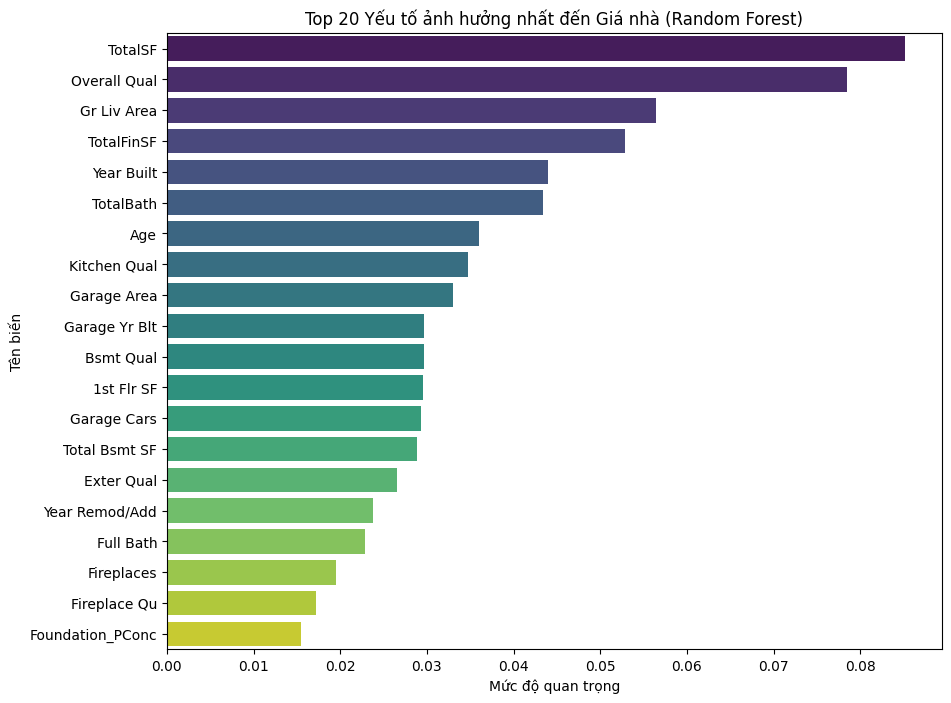

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy ra Top 20 tính năng quan trọng nhất để vẽ cho đẹp
top_20_features = df_fea_imp.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_20_features, x='Importance_level', y='Feature', palette='viridis')
plt.title('Top 20 Yếu tố ảnh hưởng nhất đến Giá nhà (Random Forest)')
plt.xlabel('Mức độ quan trọng')
plt.ylabel('Tên biến')
plt.show()

In [254]:
features_imp = df_fea_imp[df_fea_imp['Importance_level'] > 0.01]['Feature']
print(f"Số lượng biến còn lại: {len(features_imp)}")
print(features_imp.values)

Số lượng biến còn lại: 26
['TotalSF' 'Overall Qual' 'Gr Liv Area' 'TotalFinSF' 'Year Built'
 'TotalBath' 'Age' 'Kitchen Qual' 'Garage Area' 'Garage Yr Blt'
 'Bsmt Qual' '1st Flr SF' 'Garage Cars' 'Total Bsmt SF' 'Exter Qual'
 'Year Remod/Add' 'Full Bath' 'Fireplaces' 'Fireplace Qu'
 'Foundation_PConc' 'BsmtFin SF 1' 'Lot Frontage' 'TotRms AbvGrd'
 'Lot Area' 'Open Porch SF' '2nd Flr SF']


In [255]:
# data_num[features_imp].corr()
# Sửa data_num thành final_data
final_data[features_imp].corr()

,TotalSF,Overall Qual,Gr Liv Area,TotalFinSF,Year Built,TotalBath,Age,Kitchen Qual,Garage Area,Garage Yr Blt,...,Full Bath,Fireplaces,Fireplace Qu,Foundation_PConc,BsmtFin SF 1,Lot Frontage,TotRms AbvGrd,Lot Area,Open Porch SF,2nd Flr SF
TotalSF,1.000000,0.669101,0.859751,0.827430,0.390795,0.614465,-0.391103,0.510935,0.571188,0.189133,...,0.591376,0.469353,0.501566,0.392195,0.381784,0.384650,0.653815,0.288222,0.321258,0.303873
Overall Qual,0.669101,1.000000,0.567771,0.543213,0.596406,0.541081,-0.596372,0.673321,0.559959,0.278806,...,0.521083,0.389653,0.483624,0.560765,0.273390,0.193840,0.374166,0.085068,0.289103,0.239503
Gr Liv Area,0.859751,0.567771,1.000000,0.774399,0.239554,0.596353,-0.240275,0.424437,0.475429,0.143795,...,0.638898,0.451680,0.479997,0.330741,0.160374,0.338000,0.807220,0.259665,0.316614,0.666428
TotalFinSF,0.827430,0.543213,0.774399,1.000000,0.327468,0.709858,-0.326978,0.427387,0.503209,0.187177,...,0.460950,0.497404,0.467199,0.271737,0.704503,0.344870,0.548198,0.292669,0.269903,0.322634
Year Built,0.390795,0.596406,0.239554,0.327468,1.000000,0.537576,-0.999054,0.532811,0.479890,0.260086,...,0.468696,0.168660,0.243527,0.650401,0.280837,0.118601,0.108051,0.017612,0.194981,0.015467
TotalBath,0.614465,0.541081,0.596353,0.709858,0.537576,1.000000,-0.535710,0.447220,0.446591,0.153395,...,0.712165,0.334725,0.341042,0.458546,0.476868,0.191704,0.429090,0.172833,0.271858,0.350497
Age,-0.391103,-0.596372,-0.240275,-0.326978,-0.999054,-0.535710,1.000000,-0.531995,-0.479683,-0.260166,...,-0.468171,-0.168723,-0.244118,-0.650121,-0.279325,-0.118750,-0.109161,-0.018551,-0.196243,-0.016236
Kitchen Qual,0.510935,0.673321,0.424437,0.427387,0.532811,0.447220,-0.531995,1.000000,0.469200,0.199294,...,0.413045,0.242929,0.347754,0.528428,0.244698,0.163700,0.262677,0.069405,0.257392,0.147890
Garage Area,0.571188,0.559959,0.475429,0.503209,0.479890,0.446591,-0.479683,0.469200,1.000000,0.551204,...,0.405618,0.288510,0.340794,0.385900,0.293636,0.340251,0.318679,0.199704,0.221729,0.125300
Garage Yr Blt,0.189133,0.278806,0.143795,0.187177,0.260086,0.153395,-0.260166,0.199294,0.551204,1.000000,...,0.118974,0.186543,0.202628,0.132301,0.128037,0.104426,0.056950,0.072490,0.049570,0.041581


Note: pair of feature have strong correlation, respectively:
- Year Built vs Age
- Total_Qua vs Overall Qual
- TotalSF vs Total Bsmt SF
- TotalSF vss TotalFinSF
- Gr Liv Area vs TotalSF
- 1st Flr SF vs Total Bsmt SF
- Garage Cars vs Garage Area
- Total_Qua vs Kitchen Qual
- Total_Qua vss Exter Qual
- Total_Qua vs Bsmt Qual

-> Kept features:
- Age
- Total_Qua
- TotalSF
- Gr Liv Area
- 1st Flr SF
- Garage Area

### Built regressor model to predict

In [257]:
# Tạo bảng dữ liệu thu gọn chỉ chứa các biến số quan trọng nhất
data_linear = data_num[['Age', 'Total_Qua', 'TotalSF', 'Gr Liv Area', '1st Flr SF', 'Garage Area','SalePrice']].copy()

# Xem thử dữ liệu
data_linear.head()

,Age,Total_Qua,TotalSF,Gr Liv Area,1st Flr SF,Garage Area,SalePrice
0,50,18,2736.0,1656,1656,528.0,12.278398
1,49,17,1778.0,896,896,730.0,11.561725
2,52,19,2658.0,1329,1329,312.0,12.055256
3,42,22,4220.0,2110,2110,522.0,12.404928
4,13,18,2557.0,1629,928,482.0,12.154258


In [258]:
data_linear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 2929
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          2927 non-null   int64  
 1   Total_Qua    2927 non-null   int64  
 2   TotalSF      2927 non-null   float64
 3   Gr Liv Area  2927 non-null   int64  
 4   1st Flr SF   2927 non-null   int64  
 5   Garage Area  2927 non-null   float64
 6   SalePrice    2927 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 182.9 KB


In [259]:
data_linear = data_linear.dropna().copy()
data_linear

,Age,Total_Qua,TotalSF,Gr Liv Area,1st Flr SF,Garage Area,SalePrice
0,50,18,2736.0,1656,1656,528.0,12.278398
1,49,17,1778.0,896,896,730.0,11.561725
2,52,19,2658.0,1329,1329,312.0,12.055256
3,42,22,4220.0,2110,2110,522.0,12.404928
4,13,18,2557.0,1629,928,482.0,12.154258
...,...,...,...,...,...,...,...
2925,22,18,2006.0,1003,1003,588.0,11.867104
2926,23,18,1766.0,902,902,484.0,11.782960
2927,14,15,1882.0,970,970,0.0,11.790565
2928,32,18,2778.0,1389,1389,418.0,12.043560


### Train_test_Split

In [260]:
X_lr = data_linear.drop(columns = ['SalePrice'])
y_lr = data_linear['SalePrice']

# Chia tập dữ liệu: 80% để học, 20% để thi
# Lưu ý: Phải có import train_test_split nếu ở cell này chưa chạy
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size = 0.2, random_state = 42)

# Xem tập dữ liệu huấn luyện
X_train_lr

,Age,Total_Qua,TotalSF,Gr Liv Area,1st Flr SF,Garage Area
2262,0,23,3142.0,1571,1571,722.0
1678,37,17,1932.0,1302,630,440.0
2778,4,22,2777.0,1861,920,492.0
2506,1,21,1720.0,1200,520,480.0
1088,3,20,2184.0,1456,728,400.0
...,...,...,...,...,...,...
1639,1,26,3224.0,1612,1612,556.0
1095,6,22,2121.0,1414,707,403.0
1130,5,21,2592.0,1728,864,673.0
1294,88,17,2676.0,1740,960,225.0


### Model LinearRegression

In [242]:
# Huấn luyện model
model_linear = LinearRegression()

model_linear.fit(X_train_lr, y_train_lr)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [243]:
# Dự đoán
y_pred_lr = model_linear.predict(X_test_lr)

In [244]:
# chấm điểm :Tính MAE, RMSE, R2 Score.
mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_lr, y_pred_lr)

print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R² Score:", r2_lr)

MAE: 0.10104974219591199
MSE: 0.017995629032240636
RMSE: 0.13414778802589566
R² Score: 0.8998132404961627


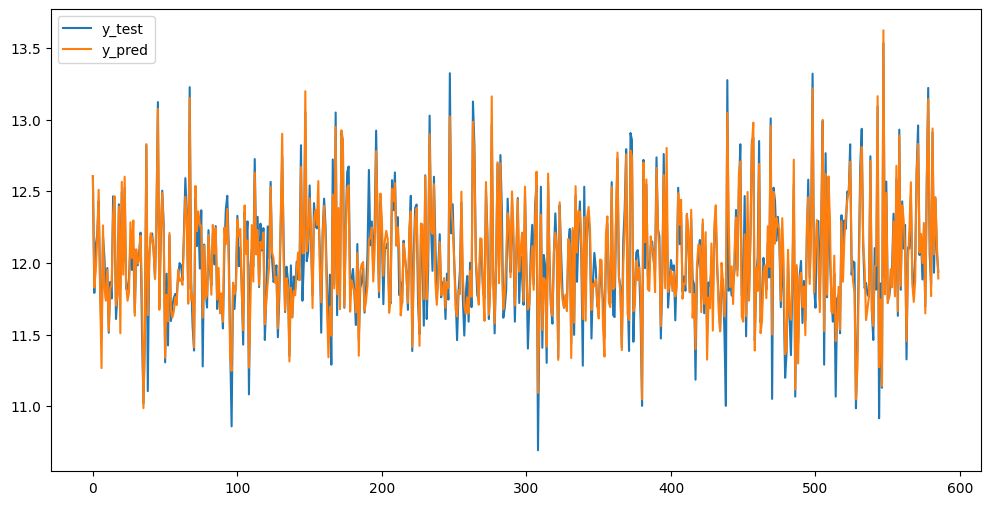

In [245]:
plt.figure(figsize=(12,6))

y_test_sorted = np.array(y_test_lr.reset_index(drop=True))
y_pred_sorted = np.array(y_pred_lr)

plt.plot(y_test_sorted, label='y_test')
plt.plot(y_pred_sorted, label='y_pred')

plt.legend()
plt.show()

# Bổ sung thêm 


Vì chúng đang dùng Linear Regression với các biến rất giống nhau (như TotalSF và Gr Liv Area), bước tiếp theo gần như bắt buộc phải là Kiểm tra Đa cộng tuyến (VIF - Variance Inflation Factor).

Mục đích là để "bắt lỗi" xem có biến nào bị thừa thãi không. 
Khi bảng hiện ra, bạn hãy nhìn vào cột VIF:

VIF < 5: ✅ Tốt, biến này độc lập, giữ lại dùng.

VIF > 10: 🚨 CẢNH BÁO ĐỎ! Biến này bị đa cộng tuyến nặng. Nó đang chứa thông tin trùng lặp với một biến khác.

Dự đoán : Khả năng rất cao là TotalSF, Gr Liv Area và 1st Flr SF sẽ có VIF cực kỳ cao (có thể lên tới 30, 50 hoặc cả trăm). Lý do là vì:

TotalSF = Tổng diện tích.

Gr Liv Area = Diện tích ở.

Đây là các gần giống y hệt nhau -> Gây nhiễu mô hình.

chạy kiểm xem thử con số VIF của TotalSF là bao nhiêu ! Nếu cao quá thì bước tiếp theo chúng ta sẽ phải thẳng tay "xóa sổ" bớt một biến đi.

In [263]:

# 1. Import thư viện tính toán VIF (Công đa tuyến - Variance Inflation Factor) từ statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2. Tạo một bảng mới để chứa kết quả
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_lr.columns

# 3. Tính toán VIF cho từng biến
# Hàm này sẽ chạy vòng lặp qua từng cột để tính độ phụ thuộc của nó vào các cột còn lại
vif_data["VIF"] = [variance_inflation_factor(X_train_lr.values, i)
                   for i in range(len(X_train_lr.columns))]

# 4. Sắp xếp giảm dần để xem "tội phạm" nào to nhất
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# 5. In kết quả
print(vif_data)

       Feature         VIF
2      TotalSF  116.134474
3  Gr Liv Area   48.137371
4   1st Flr SF   29.749824
1    Total_Qua   27.093473
5  Garage Area   11.020801
0          Age    2.283708


Nhìn vào bảng kết quả VIF trong hình, các chỉ số đang "báo động đỏ" (lớn hơn 10 là xấu,  ở đây toàn hàng chục, hàng trăm):

TotalSF (116.13): Rất cao !  Điều này chứng tỏ nó đang bị trùng lặp thông tin gần như hoàn toàn với các biến khác (dễ hiểu vì Tổng diện tích = Diện tích các tầng cộng lại).

Gr Liv Area (48.13) và 1st Flr SF (29.74): Cũng rất cao.

Bước tiếp theo (Xử lý Đa cộng tuyến):
Để mô hình Linear Regression hoạt động tốt, chúng ta bắt buộc phải loại bỏ bớt những biến này.
Thường thì người ta sẽ xóa biến có VIF cao nhất (TotalSF) hoặc xóa các biến thành phần (Gr Liv Area, 1st Flr SF) để giữ lại tổng.

In [247]:
# --- BƯỚC 1: RESET DỮ LIỆU (Quan trọng để sửa lỗi KeyError) ---
# Import lại thư viện cần thiết
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Chia lại tập dữ liệu từ đầu để đảm bảo các cột TotalSF, Gr Liv Area quay trở lại
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

print("✅ Đã reset dữ liệu thành công (đầy đủ các cột).")

# --- BƯỚC 2: XÓA CỘT BỊ ĐA CỘNG TUYẾN (VIF CAO) ---
drop_cols = ['TotalSF', 'Gr Liv Area']

# Bây giờ xóa thì chắc chắn không bị lỗi nữa
X_train_new = X_train_lr.drop(columns=drop_cols)
X_test_new = X_test_lr.drop(columns=drop_cols)

print(f"✅ Đã loại bỏ các cột: {drop_cols}")

# --- BƯỚC 3: HUẤN LUYỆN LẠI MÔ HÌNH ---
lm_new = LinearRegression()
lm_new.fit(X_train_new, y_train_lr)

# --- BƯỚC 4: DỰ ĐOÁN VÀ CHẤM ĐIỂM ---
y_pred_new = lm_new.predict(X_test_new)

mae_new = mean_absolute_error(y_test_lr, y_pred_new)
rmse_new = np.sqrt(mean_squared_error(y_test_lr, y_pred_new))
r2_new = r2_score(y_test_lr, y_pred_new)

print("-" * 30)
print("KẾT QUẢ MỚI (SAU KHI LOẠI BỎ BIẾN TRÙNG LẶP):")
print(f"MAE: {mae_new:.2f}")
print(f"RMSE: {rmse_new:.2f}")
print(f"R2 Score: {r2_new:.4f}")

✅ Đã reset dữ liệu thành công (đầy đủ các cột).
✅ Đã loại bỏ các cột: ['TotalSF', 'Gr Liv Area']
------------------------------
KẾT QUẢ MỚI (SAU KHI LOẠI BỎ BIẾN TRÙNG LẶP):
MAE: 0.13
RMSE: 0.17
R2 Score: 0.8479


kết quả R² = 0.8479 là một con số tốt và việc nó thấp hơn khi chúng ta training với dữ liệu không xử lý VIF như ở trên ( R² Score = 0.8998) một chút là hoàn toàn bình thường ! 

tại sao sự "thụt lùi" này lại là một thành công:

1. Tại sao điểm số lại giảm?
Trước khi xóa: Chúng ta có cả TotalSF (Tổng diện tích) và Gr Liv Area (Diện tích ở). Hai ông này như "anh em sinh đôi", cùng hét vào tai mô hình một thông tin giống nhau. Điều này làm mô hình "tự tin thái quá" nên điểm số có thể nhỉnh hơn chút xíu.

Sau khi xóa: Chúng ta đã cắt bỏ bớt thông tin trùng lặp. Mô hình giờ phải tự lực cánh sinh dựa trên những biến còn lại. Việc điểm số giảm nhẹ (từ khoảng 0.85-0.89 xuống 0.8479) là cái giá rất rẻ để đổi lấy sự ổn định.

2. Tại sao mô hình này lại "xịn" hơn? (Dù điểm thấp hơn)
Trong Data Science, Điểm cao chưa chắc đã tốt nếu mô hình bị "bệnh" Đa cộng tuyến:

Mô hình cũ (VIF cao): Nếu diện tích nhà tăng 1m2, có khi mô hình bối rối không biết nên cộng tiền vào biến TotalSF hay biến Gr Liv Area. Trọng số (Coefficient) của nó sẽ bị sai lệch, lúc âm lúc dương rất vô lý.

Mô hình mới (VIF thấp): Các biến số giờ đây độc lập và "sạch sẽ". Nếu bạn dùng mô hình này để giải thích cho khách hàng (ví dụ: "Nhà thêm 1 phòng tắm thì giá tăng bao nhiêu?"), con số đưa ra sẽ đáng tin cậy hơn nhiều.

👉 Tóm lại: Chúng ta đã đánh đổi một chút xíu độ chính xác ảo để lấy một mô hình "khỏe mạnh" và đáng tin cậy hơn.

Code Lưu Mô hình (Save)
Bạn chạy đoạn code này để lưu 2 thứ quan trọng:

Cái não (Mô hình lm_new): Chứa các công thức toán học đã học được.

Cái sườn (Danh sách cột X_train_new.columns): Để sau này biết cần nhập dữ liệu gì vào.

In [264]:
import joblib

# 1. Đặt tên file
model_filename = 'house_price_model.pkl'
features_filename = 'model_features.pkl'

# 2. Lưu mô hình (Save Model)
joblib.dump(lm_new, model_filename)

# 3. Lưu danh sách các cột đã dùng (Save Feature List)
# Cực kỳ quan trọng! Để sau này biết cần nhập những thông tin gì
joblib.dump(X_train_new.columns, features_filename)

print(f"✅ Đã lưu mô hình thành công vào file: {model_filename}")
print(f"✅ Đã lưu danh sách biến vào file: {features_filename}")

✅ Đã lưu mô hình thành công vào file: house_price_model.pkl
✅ Đã lưu danh sách biến vào file: model_features.pkl
